# Understanding Updating Belief Using Bayes Theorem
##### Diagnostic Testing Example 
##### Elan Ness-Cohn

In [1]:
# Preamble For Your Code

#Don't have a package installed?
#type in your terminal: pip3 install numpy

import numpy as np
import matplotlib.pyplot as plt



# Population Statistics of Healthy vs Sick

In [2]:
#prob D+
p_sick = .01
#prob D-
p_healthy = 1 - p_sick

population = 10000
print("Population: ", population)
#people D+
sick = p_sick * population
print("Sick: ",  sick)
#people D-
healthy = p_healthy * population
print("Healthy: ", healthy)

Population:  10000
Sick:  100.0
Healthy:  9900.0


# Probabilities of testing positive and negative given the illness

In [3]:
#P(+|D+)
pos_given_sick = 0.8
#P(-|D+)
neg_given_sick = 1 - pos_given_sick

In [4]:
#P(+|D-)
pos_given_healthy = 0.096
#P(-|D-)
neg_given_healthy = 1 - pos_given_healthy

In [5]:
#TP = D+ * P(+|D+)
true_pos = sick*pos_given_sick
#FN = D+ * P(-|D+)
false_neg = sick*neg_given_sick
#FP = D- * P(+|D-)
false_pos = healthy*pos_given_healthy
#TN = D- * P(-|D-)
true_neg = healthy*neg_given_healthy

#Lets not take part of a person, so lets round
print("TP:" , np.round(true_pos))
print("FN:" , np.round(false_neg))
print("FP:" , np.round(false_pos))
print("TN:" , np.round(true_neg))

TP: 80.0
FN: 20.0
FP: 950.0
TN: 8950.0


# What is the chances that I have Disease given the test is positive?

$p(D^{+}|+) = \frac{P(+|D^{+})*P(D^{+})}{P(+)}$

In [6]:
#TP/(TP+FP)
out = true_pos / (true_pos + false_pos)
print(out)
print(np.round(out, decimals= 2))

0.07763975155279502
0.08


# What is the chances that I have Disease given the test is positive?

$p(D^{+}|+) = \frac{P(+|D^{+})*P(D^{+})}{P(+)}$

In [7]:
num = pos_given_sick*p_sick 
denom = pos_given_sick*p_sick + pos_given_healthy*p_healthy
p_sick_given_pos = np.round(num/denom, decimals= 2)
print(p_sick_given_pos)

0.08


# What is the chances that I am healthy given that test positive?

$p(D^{-}|+) = \frac{P(+|D^{-})*P(D^{-})}{P(+)}$

In [8]:
num = pos_given_healthy*p_healthy
denom = pos_given_sick*p_sick + pos_given_healthy*p_healthy

p_healthy_given_pos = np.round(num/denom, decimals= 2)
print(p_healthy_given_pos)

#or
print(1- p_sick_given_pos)

0.92
0.92


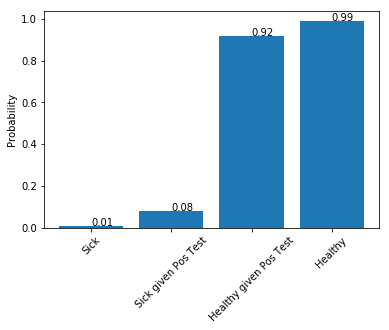

In [9]:
#Lets Plot the Results

plotVals = [p_sick, p_sick_given_pos, p_healthy_given_pos, p_healthy]
labels = ["Sick","Sick given Pos Test","Healthy given Pos Test","Healthy"]
plt.bar(x = labels, height=plotVals)
plt.ylabel("Probability")
plt.xticks(rotation=45)

for index, value in enumerate(plotVals):
    plt.text(index, value, str(value), rotation = 0)

# What is the chances you are sick given 1-6 positive tests in a row?

$p(D^{+}|++) = \frac{P(++|D^{+})*P(D^{+})}{P(++)}$

In [14]:
#Initial parameters
p_sick = .01
p_healthy = 1 - p_sick

pos_given_sick = 0.9
neg_given_sick = 1 - pos_given_sick

pos_given_healthy = 0.096
neg_given_healthy = 1 - pos_given_healthy

test_Num = 6

#create array to hold outputs 
p_sick_nPos = np.zeros(test_Num)
p_healthy_nPos = np.zeros(test_Num)

#set initial belief
p_sick_nPos[0] = p_sick
p_healthy_nPos[0] = p_healthy

#update belief after each test
for i in np.arange(1,test_Num):
    #compute num and denom
    num = pos_given_sick * (p_sick)
    denom = num + (pos_given_healthy) * (p_healthy)
    #update beliefs
    p_sick = num/denom
    p_healthy = 1 - p_sick
    p_sick_nPos[i] = np.round(p_sick, decimals= 2)
    p_healthy_nPos[i] = np.round(p_healthy, decimals= 2)
    
print(p_sick_nPos)
print(p_healthy_nPos)

[0.01 0.09 0.47 0.89 0.99 1.  ]
[0.99 0.91 0.53 0.11 0.01 0.  ]


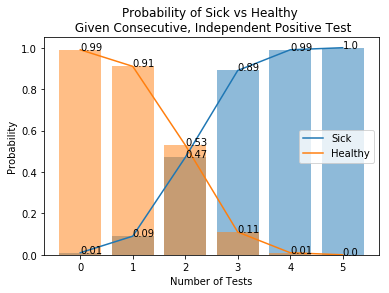

In [15]:
#lets plot the results
plt.bar(x = np.arange(test_Num), height=p_sick_nPos, alpha=.5)
plt.xlabel("Probability")
plt.ylabel("Number of Tests")
plt.xticks(rotation=0)

for index, value in enumerate(p_sick_nPos):
    plt.text(index, value, str(value), rotation = 0)
    
plt.bar(x = np.arange(test_Num), height=p_healthy_nPos, alpha=.5)
plt.xlabel("Number of Tests")
plt.ylabel("Probability")
plt.title("Probability of Sick vs Healthy \n Given Consecutive, Independent Positive Test")

for index, value in enumerate(p_healthy_nPos):
    plt.text(index, value, str(value), rotation = 0)

plt.plot(np.arange(test_Num),p_sick_nPos)
plt.plot(np.arange(test_Num),p_healthy_nPos)
plt.legend(labels = ["Sick", 'Healthy'], loc = 7)

# What If we wanted to Run This Test Sweeping a Range of Parameters?
i.e See how the True Positive and False Positive rates effect testing results

In [25]:
# let's turn the test and plotting into a function so we can easily manipulate the input variables!
# we can easily turn our above "rapid prototyping" code into functions by determining which 
# variable we want to manipulate
# Note that I copy and pasted with MINOR edits (denoted by ***)

def p_Sick_Test_Tracker(p_sick, pos_given_sick, pos_given_healthy, test_Num):
    '''
    input:
        p_sick = Probability of being sick
        pos_given_sick = True Positive Rate = Probability of Positive test given sick
        pos_given_healthy = False Positive Rate = Probability of Positive test given Healthy
        test_Num = Number of tests preformed
    out: 
        List 
        [1] probability of sick being given n Positive tests
        [2] probability of healthy being given n Positive tests
    '''
    
    #Initial parameters
    #*** removed assignments lines that are now defined by the Function
    p_healthy = 1 - p_sick
    neg_given_sick = 1 - pos_given_sick
    neg_given_healthy = 1 - pos_given_healthy

    #create array to hold outputs 
    p_sick_nPos = np.zeros(test_Num)
    p_healthy_nPos = np.zeros(test_Num)

    #set initial belief
    p_sick_nPos[0] = p_sick
    p_healthy_nPos[0] = p_healthy

    #update belief after each test
    for i in np.arange(1,test_Num):
        #compute num and denom
        num = pos_given_sick * (p_sick)
        denom = num + (pos_given_healthy) * (p_healthy)
        #update beliefs
        p_sick = num/denom
        p_healthy = 1 - p_sick
        p_sick_nPos[i] = np.round(p_sick, decimals= 2)
        p_healthy_nPos[i] = np.round(p_healthy, decimals= 2)

    #*** return the resutls instead of printing
    return(np.round([p_sick_nPos, p_healthy_nPos], decimals= 3))


def plot_Sick_Test_Tracker(p_sick_nPos,p_healthy_nPos):
    '''
    input:
        p_sick_nPos = array of probability of sick being given n Positive tests
        p_healthy_nPos = probability of healthy being given n Positive tests
    out: 
        Bar Plot
    '''
    #*** assigned test_Num by the length of p_sick_nPos 
    test_Num = len(p_sick_nPos)
    plt.bar(x = np.arange(test_Num), height=p_sick_nPos, alpha=.5)
    plt.xlabel("Probability")
    plt.ylabel("Number of Tests")
    plt.xticks(rotation=0)

    for index, value in enumerate(p_sick_nPos):
        plt.text(index, value, str(value), rotation = 0)

    plt.bar(x = np.arange(test_Num), height=p_healthy_nPos, alpha=.5)
    plt.xlabel("Number of Tests")
    plt.ylabel("Probability")
    plt.title("Probability of Sick vs Healthy \n Given Consecutive, Independent Positive Test")


    for index, value in enumerate(p_healthy_nPos):
        plt.text(index, value, str(value), rotation = 0)

    plt.plot(np.arange(test_Num),p_sick_nPos)
    plt.plot(np.arange(test_Num),p_healthy_nPos)
    plt.legend(labels = ["Sick", 'Healthy'], loc = 7)
    return(plt.show)

# Test Away to you Hearts Content with REAL Data!

0.003076923076923077


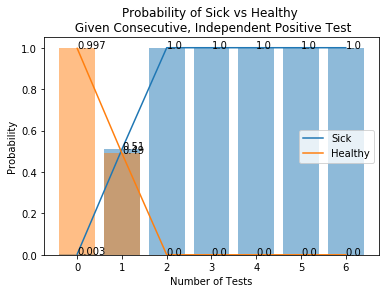

In [28]:
# Lets do a real world example looking at HIV rates in the US for any random person

# At the end of 2017, there were 1,018,346 adults and adolescents with diagnosed HIV in the US and dependent areas
# https://www.cdc.gov/hiv/statistics/overview/index.html

# There is ~324.5 million people in the US (2017)
# https://www.census.gov/popclock/

#The insti-rapid Hiv1/2 test antibody test
#True Positive Rate = 99.7%
#False Positive Rate = 0.3%
0.03
#https://www.who.int/diagnostics_laboratory/evaluations/191111_amended_final_pqpr_0002_002_00_v5.pdf

paramTest = p_Sick_Test_Tracker(p_sick = 1/325, 
                                pos_given_sick = .997, 
                                pos_given_healthy = 0.003, 
                                test_Num = 7)

plot_Sick_Test_Tracker(paramTest[0],paramTest[1])

# Note this is for a RANDOM Person in the US going in to get a test.
# An Individual who thinks they actually have HIV (i.e. they were exposed) has a different initial belief that 
# are sick. Their specific p_sick is larger and we can be more confident in the test.


# Go Further: Try writting code to test 9 differnt parameter combinations with 5 positive tests each.
 Plot the results in a 9X9 Gride